# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset

In [2]:
os.chdir("C:\\Users\\Emmanuel\\Downloads\\Youtube_and_spotify")

In [3]:
spot_data= pd.read_csv("Spotify_Youtube.csv")

In [4]:
spot_data.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
spot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [6]:
spot_data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


# Checking unique values

In [7]:
spot_data.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

# Handling null values

In [8]:
spot_data.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [9]:
filtered_spot=spot_data.fillna(value=spot_data["Stream"])
filtered_spot1=spot_data.dropna()

In [10]:
filtered_spot1.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

# Exploring the data

In [11]:
album_type_count =filtered_spot1['Album_type'].value_counts()
print(album_type_count)

album          13845
single          4636
compilation      689
Name: Album_type, dtype: int64


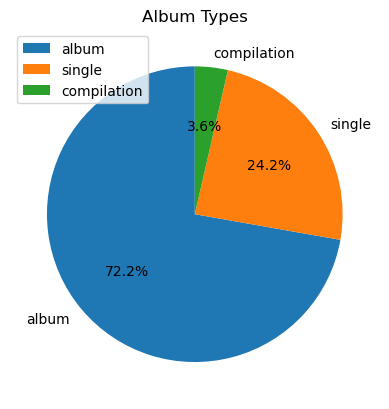

In [12]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

Most streamed artist in Youtube and Spotify

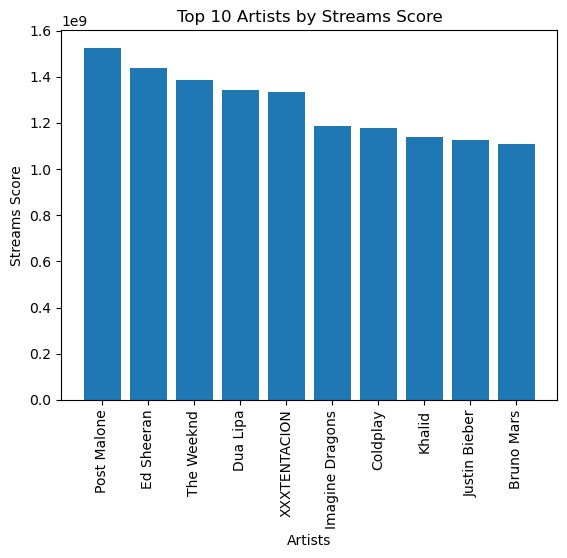

In [13]:
#Making the column "Artist" as the index
filtered_spot1_artist = filtered_spot1.set_index("Artist")
filtered_spot1_artist = filtered_spot1_artist[["Stream"]]
# Group the data by artist and calculate the mean danceability score

filtered_spot1_artist_grouped = filtered_spot1_artist.groupby('Artist')['Stream'].mean().reset_index()
# Sort the dataframe by danceability score in descending order
filtered_spot1_artist_sorted = filtered_spot1_artist_grouped.sort_values(by='Stream', ascending=False)
# Select the top 10 artists with the highest danceability scores
top_10_artists = filtered_spot1_artist_sorted.head(10)
# Create a bar graph of the danceability scores for the top 10 artists
plt.bar(top_10_artists['Artist'], top_10_artists['Stream'])
plt.xlabel('Artists')
plt.ylabel('Streams Score')
plt.xticks(rotation=90)
plt.title('Top 10 Artists by Streams Score')
plt.show()


# Choosing a Target and Features of the Model

In [14]:
filtered_spot1.columns


Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

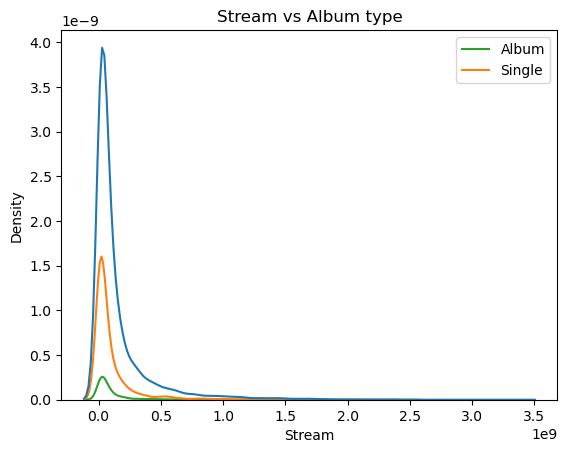

In [23]:
sns.kdeplot(data=filtered_spot1, x='Stream', hue='Album_type')
plt.title('Stream vs Album type')
plt.legend(['Album', 'Single'])

Text(0.5, 1.0, 'Histogram of loudness')

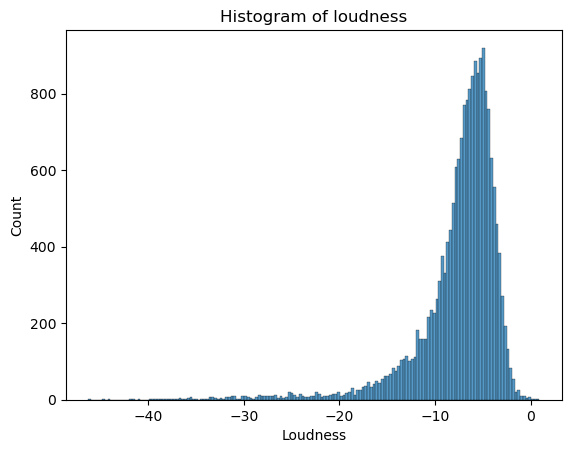

In [24]:
sns.histplot(filtered_spot1['Loudness'])
plt.title("Histogram of loudness")

Correlation in the Data

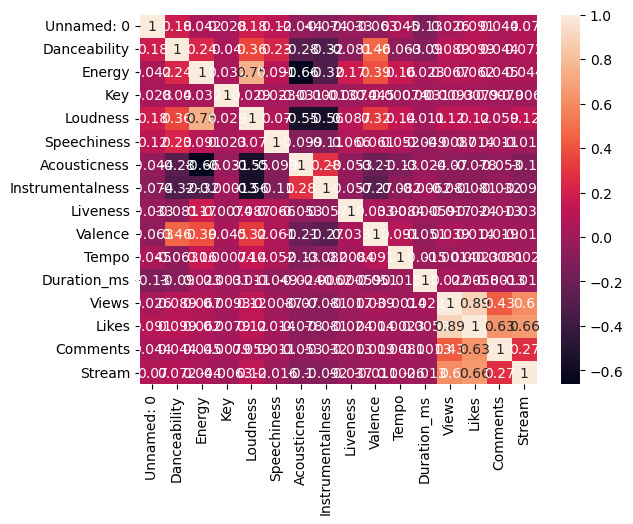

<Figure size 2000x1600 with 0 Axes>

In [15]:
sns.heatmap(filtered_spot1.corr(), fmt='.2g', annot=True)
plt.figure(figsize=(20,16))
plt.show()

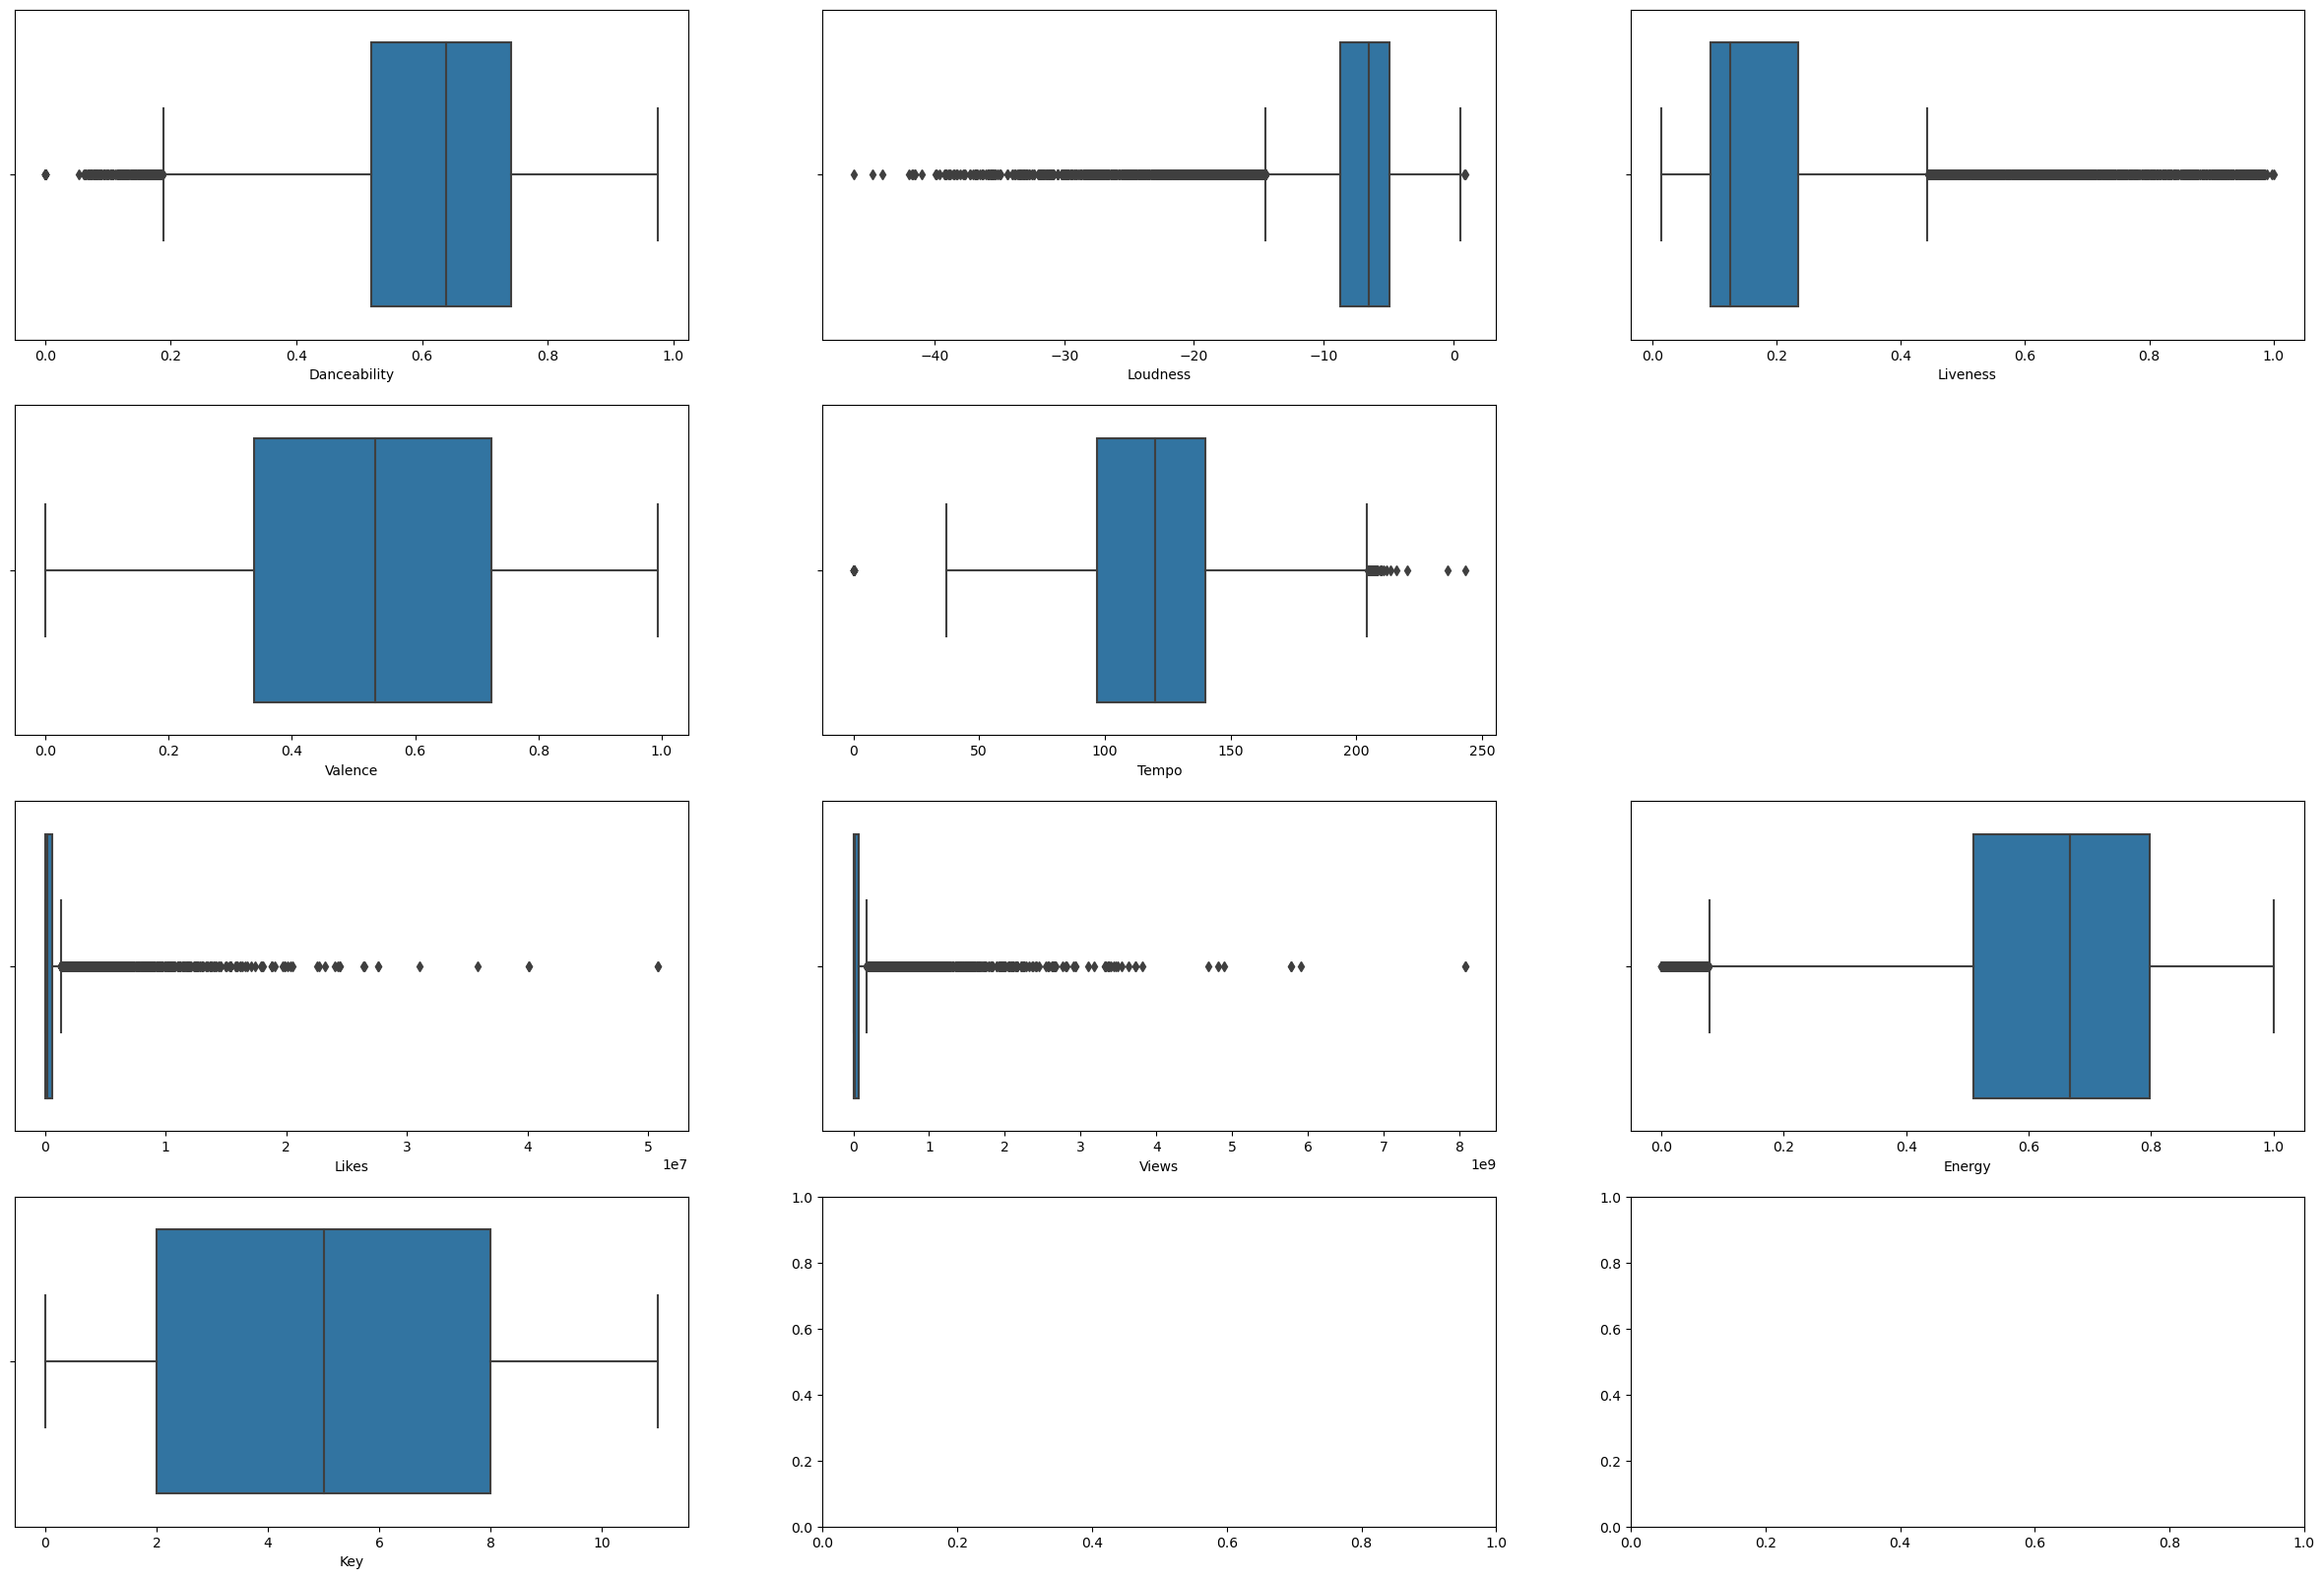

In [16]:
spot_features = ['Danceability', 'Loudness', 
                      'Liveness'  ,'Valence','Tempo','Duration_ms', 'Likes','Views','Energy','Key']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
axs = axs.flatten()

#Show the boxplot 

for i, var in enumerate(spot_features):
    sns.boxplot(x=var, data=filtered_spot1, ax=axs[i])
    
#Adjecting spacing between subplots
fig.delaxes(axs[5])

plt.show()

In [17]:
y = filtered_spot1.Stream
spot_features = ['Danceability', 'Loudness', 
                      'Liveness'  ,'Valence','Tempo','Duration_ms', 'Energy','Key']
X = filtered_spot1[spot_features]

# Creating a model with Decision Tree and Random Forest Algorthims

In [19]:

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
spot_model = RandomForestRegressor(random_state=1)
# Fit model
spot_model.fit(train_X, train_y)

# get predicted streams on validation data
val_predictions = spot_model.predict(val_X)
print("Making predictions for the following 5 streams:")
print(X.head())
print("The predictions are")
print(spot_model.predict((val_X).head()))
print("Mean Absolute Error:",mean_absolute_error(val_y, val_predictions))
    

Making predictions for the following 5 streams:
   Danceability  Loudness  Liveness  Valence    Tempo  Duration_ms  Energy  \
0         0.818    -6.679    0.6130    0.772  138.559     222640.0   0.705   
1         0.676    -5.815    0.0463    0.852   92.761     200173.0   0.703   
2         0.695    -3.930    0.1160    0.551  108.014     215150.0   0.923   
3         0.689    -5.810    0.0640    0.578  120.423     233867.0   0.739   
4         0.663    -8.627    0.0698    0.525  167.953     340920.0   0.694   

    Key  
0   6.0  
1   8.0  
2   1.0  
3   2.0  
4  10.0  
The predictions are
[2.08020578e+08 1.07381193e+08 1.27779093e+08 3.89122254e+07
 1.12903150e+08]
Mean Absolute Error: 134614823.14463267


In [20]:
print("Training Accuracy ",spot_model.score(train_X, train_y))

Training Accuracy  0.8857677888291897


In [21]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
spot_model = DecisionTreeRegressor()
# Fit model
spot_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = spot_model.predict(val_X)
print("Making predictions for the following 5 streams:")
print(X.head())
print("The predictions are")
print(spot_model.predict((val_X).head()))
print("Mean Absolute Error:",mean_absolute_error(val_y, val_predictions))



Making predictions for the following 5 streams:
   Danceability  Loudness  Liveness  Valence    Tempo  Duration_ms  Energy  \
0         0.818    -6.679    0.6130    0.772  138.559     222640.0   0.705   
1         0.676    -5.815    0.0463    0.852   92.761     200173.0   0.703   
2         0.695    -3.930    0.1160    0.551  108.014     215150.0   0.923   
3         0.689    -5.810    0.0640    0.578  120.423     233867.0   0.739   
4         0.663    -8.627    0.0698    0.525  167.953     340920.0   0.694   

    Key  
0   6.0  
1   8.0  
2   1.0  
3   2.0  
4  10.0  
The predictions are
[3.84129970e+08 3.48280701e+08 3.67485508e+08 3.49480800e+07
 1.17433680e+07]
Mean Absolute Error: 167863195.24128938
